In [1]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

The same as  `1_magnn-match.ipynb`, but without photometric prior information.

In [2]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, prepare_nway_results
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

matplotlib settings set


matplotlib settings set
This is NWAY Python API
nwaylib file /Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py


# Nway run in distance-only mode

In [3]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1)

nway_args = {'match_radius':30, 'prior_completeness':1,}


In [4]:

nway_res_orig = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res, nway_res_random);

    adding angular separation columns
matching: 108260 matches after filtering by search radius
Primary catalogue "EROSITA" (6885), density gives 1.86e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 6885/6885 [00:01<00:00, 3498.66it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...
/Users/sdbykov/work/my_packages/nway/nwaylib/__init__.py:447: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  table = table.groupby(table.columns[0], sort=False).apply(

In [5]:
from scripts.cross_match_scripts import prepare_nway_results


nway_res, nway_res_best = prepare_nway_results(nway_res_orig,
                        ero_for_nway_fits = "ERO_lhpv_03_23_sd01_a15_g14.fits",
                        desi_for_nway_fits = "desi_lh.fits",
                        ero_full_cat = 'ERO_lhpv_03_23_sd01_a15_g14.pkl',
                        desi_full_cat = 'desi_lh.gz_pkl',
                        ero_desi_ctps_file = 'validation_ctps_ero_desi_lh.csv')


/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sdbykov/opt/miniconda3/envs/venv_hea/lib/python3.10/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: invalid value encountered in log10
  result = getattr

conjugation test passed
number of incorrect matches:  62  out of  529  validation sources
assigning nway_match_flag=2 to all incorrect matches
assigning nway_match_flag=1 to the corresponding correct pairs desi_id -- desi_id_true


In [6]:
nway_res.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only_all_candidates.gz_pkl', compression='gzip')

nway_res_best.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_desi_nway_match_dist_only.gz_pkl', compression='gzip')

 Completeness = 87% 
 Purity = 87% 
 nway_prob_has_match optimal cutoff =  0.24 
 Fraction of sources with prob_has_match > 0.24 = 92%


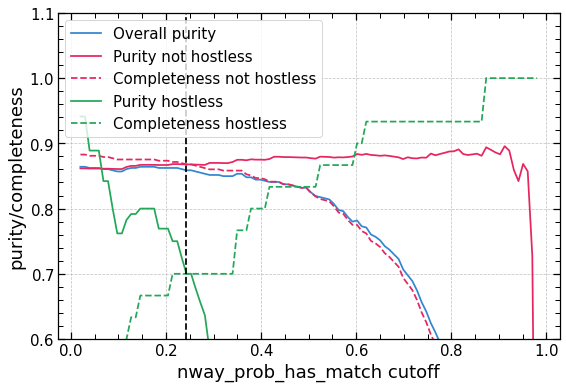

p_any cut: 0.24

                Total validation set: 559
                	 Total hostless: 30
                	 Total not hostless: 529
                Assigned not hostless:
                	 Correct not hostless with correct ctp: 460
                	 Correct not hostless with incorrect ctp: 61
                	 Incorrect not hostless: 9
                Assigned hostless:
                	 Incorrect hostless: 8
                	 Correct hostless: 21

                Overall purity: 0.86
                Not hostless purity: 0.87
                Not hostless completeness: 0.87
                Hostless purity: 0.72
                Hostless completeness: 0.70
            


In [7]:
from scripts.cross_match_scripts import  assess_goodnes_of_cross_match

_ = assess_goodnes_of_cross_match(nway_res.query('nway_match_flag==1'), p_any_cut=0.24)